In [34]:
### import packages ###

from astropy.io import fits
import matplotlib.pyplot as plt

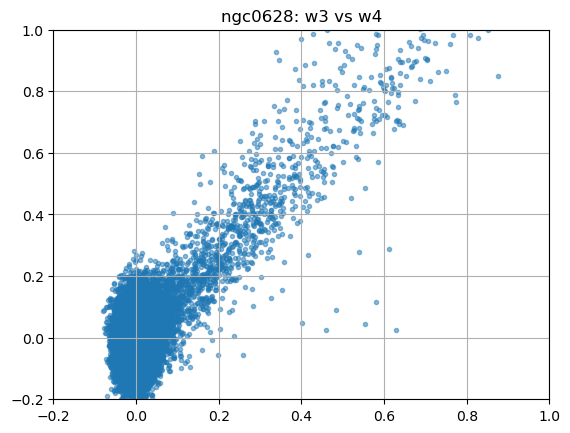

In [35]:
### this is a more automated version of the above ###

# choose which fits files to open (this is the only place you have to change anything to plot different galaxies)
first_wise = 'w3'
second_wise = 'w4'
galaxy = 'ngc0628'

def file_name(wise_number): # wise number must be a string
    return '/Users/michaelhill/Downloads/raw_background_comps/' + galaxy + '_' + wise_number + '_mjysr.fits' # you probably have to modify this
image_data_1 = fits.getdata(file_name(first_wise))
image_data_2 = fits.getdata(file_name(second_wise))


def downsample(arr, n): # takes an array as an argument and returns list containing only every nth element
    result = []
    for i in range(0, len(arr) + 1 - n, n): # not taking into account last few data points that don't fit in a set of size n
        sum = 0
        for j in range(n):
            sum += arr[i+j] # for each increment of n data points, we're going through and summing each one
        result.append(sum / n) # we're appending the average of the last n data points to result
    return result
# if n is, say, 15, then downsample() will return 1/15th of the total number of data points in original fits
# you could implement this in a simpler manner if you want (without nested for loops)


# make scatter plot
plt.scatter(downsample(image_data_1, 15), downsample(image_data_2, 15), marker='.', alpha=.5) # marker reduces point size, alpha makes more transparent
plt.xlim(-.2, 1)
plt.ylim(-.2, 1)
plt.title(galaxy + ': ' + first_wise + ' vs ' + second_wise)
plt.grid()

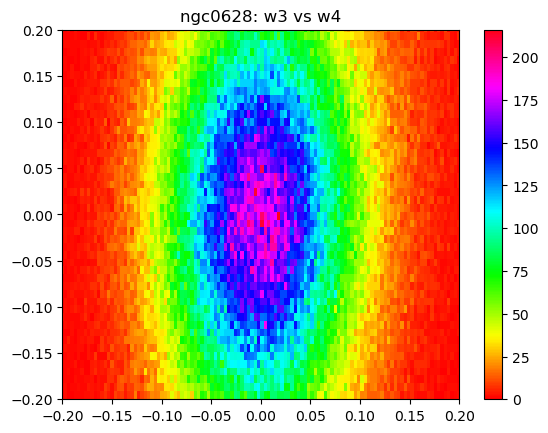

In [36]:
### make 2d histogram ###
plt.hist2d(image_data_1.flatten(), image_data_2.flatten(), bins=(3000, 3000), cmap=plt.cm.hsv) # options: see https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html (jet, seismic, Set1 are good)
plt.xlim(-.2, .2)
plt.ylim(-.2, .2)
plt.colorbar()
plt.title(galaxy + ': ' + first_wise + ' vs ' + second_wise)
plt.show()
# the x-axis represents the intensities of the first channel and the y-axis the intensities of the second channel
# 2D histogram is the same as the 1D histogram with the difference that it counts the occurence of combinations of intensities (instead of just occurence of intensities)

In [37]:
# I don't get what the ovular shape of the 2d histogram means
# also, it only really seems to work for w3 vs w4